WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.


MSVC Compiler Version: 14.2


D:\10Academy1\week-10\src\data_loader.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")  # Convert Date column to datetime
The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
D:\10Academy1\week-10\week10\lib\site-packages\deprecat\classic.py:232: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
D:\10Academy1\week-10\week10\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variabl

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 55369 seconds.
There were 390 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.20836072952507426, but should be close to 0.8. Try to increase the number of tuning steps.
There were 429 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.27176648577024554, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
C:\Users\zeyed\AppData\Local\Temp\ipykernel_17512\2233896090.py:31: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.

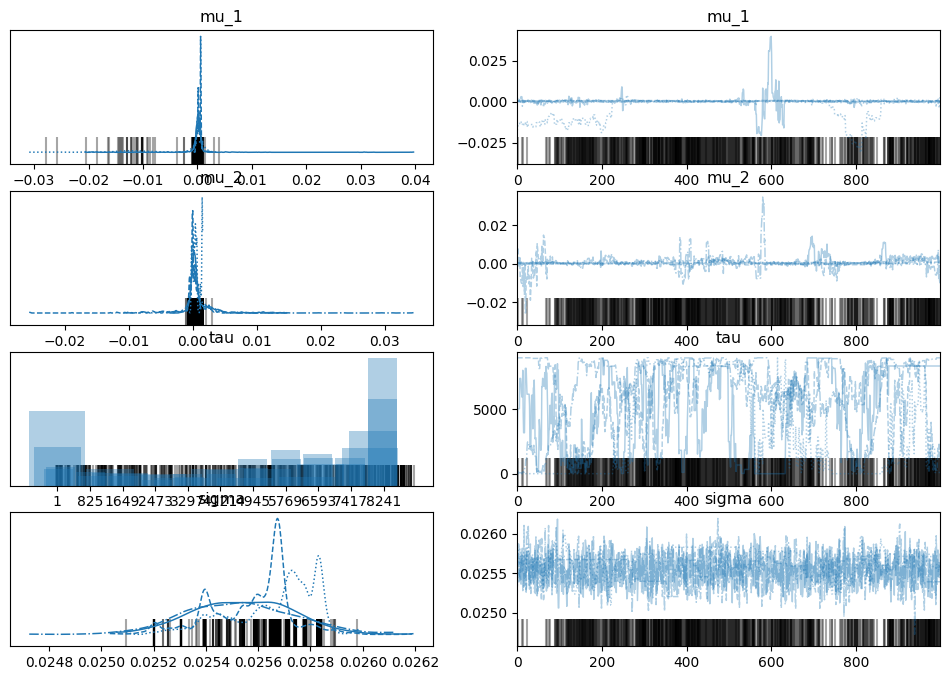

Got error No model on context stack. trying to find log_likelihood in translation.
D:\10Academy1\week-10\week10\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


           mean        sd  hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
mu_1     -0.001     0.005  -0.012     0.002      0.001    0.001      45.0   
mu_2      0.001     0.002  -0.002     0.004      0.000    0.000      80.0   
tau    5249.875  3309.906   1.000  8974.000    610.074  435.735      30.0   
sigma     0.026     0.000   0.025     0.026      0.000    0.000      80.0   

       ess_tail  r_hat  
mu_1       27.0   1.07  
mu_2      175.0   1.04  
tau        17.0   1.12  
sigma     700.0   1.05  


In [1]:
import sys
import os
import pymc3 as pm  # Keep using pymc3
import matplotlib.pyplot as plt

# Specify the path to the src directory directly
src_dir = os.path.abspath(os.path.join("..", "src"))  # Adjust this path as needed
sys.path.append(src_dir)  # Add the src directory to the path

# Import necessary modules
try:
    from data_loader import load_brent_data, compute_log_returns
    from change_point_model import build_change_point_model
except ModuleNotFoundError as e:
    print(f"Error: {e}")

# Load and prepare data
df = load_brent_data("../data/raw/BrentOilPrices.csv")
df = compute_log_returns(df)
returns = df["Log_Returns"].values

# Build the model
model = build_change_point_model(returns)

# Sample from the model
with model:
    # Sample with fewer iterations for quicker testing
    trace = pm.sample(1000, tune=500)  # Adjust as needed

# Plot results
pm.traceplot(trace, var_names=["mu_1", "mu_2", "tau", "sigma"])
plt.show()

# Print summary of the trace
summary = pm.summary(trace, var_names=["mu_1", "mu_2", "tau", "sigma"])
print(summary)

In [5]:
from change_point_model import build_change_point_model  # assuming this is where trace is generated
from data_loader import load_brent_data

df = load_brent_data()
trace = build_change_point_model(df)
plot_with_change_point(df, trace)

TypeError: load_brent_data() missing 1 required positional argument: 'file_path'